In [1]:
from utils import *

In [2]:
#data_dir = "cityscapes_dataset"
data_dir = "metal_nut_dataset"

learning_rate = 0.01
batch_size = 32 # 16 for MRI with fcn on T4, 32 with unet (16GB max)
epochs = 20

enable_data_augmentation=True
enable_affine_transform=False
enable_horizontal_flip=True

max_rotation = 15
max_translation = 0.1
min_scale = 0.8
max_scale = 1.2

#model_name = "deeplabv3_resnet50"
#model_name = "fcn_resnet50"
model_name = "unet"

save_path = "model.pth"

In [3]:
categories = get_categories_list(data_dir)
N_categories = len(categories)

Getting categories from train subfolder (minus images folder)


In [4]:
loaders = get_data_loaders(data_dir,
                           enable_data_augmentation=enable_data_augmentation,
                           enable_affine_transform=enable_affine_transform,
                           enable_horizontal_flip=enable_horizontal_flip,
                           batch_size=batch_size,
                           max_rotation=max_rotation,
                           max_translation=max_translation,
                           min_scale=min_scale,
                           max_scale=max_scale)

# test loader may not exist
train_loader = loaders[0]
val_loader = loaders[1]

Getting categories from train subfolder (minus images folder)


In [5]:
model, get_model_pred = get_and_adapt_pretrained_model(model_name, N_categories)

Using cache found in /root/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [7]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3)
criterion = nn.BCELoss(reduction='mean')

In [8]:
# only one epoch, just to show that we could train the model in the notebook
train_loss_list, train_dice_coef,val_loss_list,val_dice_coef = train(
    model, get_model_pred, optimizer, criterion, scheduler, train_loader, val_loader, num_epochs=epochs, device=device, save_path=save_path)


Epoch: 1
Train Loss: 0.24841
Train Dice Coef: 0.00560
Train IoU: 0.00283
Valid Loss: 0.57695
Valid Dice Coef: 0.00000
Valid IoU: 0.00000

Model checkpoint saved as model.pth

Epoch: 2
Train Loss: 0.05273
Train Dice Coef: 0.00000
Train IoU: 0.00000
Valid Loss: 0.57676
Valid Dice Coef: 0.00000
Valid IoU: 0.00000

Model checkpoint saved as model.pth

Epoch: 3
Train Loss: 0.04304
Train Dice Coef: 0.00000
Train IoU: 0.00000
Valid Loss: 0.53690
Valid Dice Coef: 0.00000
Valid IoU: 0.00000

Model checkpoint saved as model.pth

Epoch: 4
Train Loss: 0.03770
Train Dice Coef: 0.00000
Train IoU: 0.00000
Valid Loss: 0.05243
Valid Dice Coef: 0.00000
Valid IoU: 0.00000

Model checkpoint saved as model.pth

Epoch: 5
Train Loss: 0.03214
Train Dice Coef: 0.09016
Train IoU: 0.05076
Valid Loss: 0.03407
Valid Dice Coef: 0.16868
Valid IoU: 0.09211

Model checkpoint saved as model.pth

Epoch: 6
Train Loss: 0.02345
Train Dice Coef: 0.35934
Train IoU: 0.22364
Valid Loss: 0.05666
Valid Dice Coef: 0.00000
Valid 

In [9]:
datasets = get_data_loaders(data_dir,
                            batch_size=batch_size,
                            enable_data_augmentation=enable_data_augmentation,
                            enable_affine_transform=enable_affine_transform,
                            enable_horizontal_flip=enable_horizontal_flip,
                            max_rotation=max_rotation,
                            max_translation=max_translation,
                            min_scale=min_scale,
                            max_scale=max_scale,
                            return_datasets=True)

train_dataset = datasets[0]
val_dataset = datasets[1]

Getting categories from train subfolder (minus images folder)


In [10]:
color_map = get_color_map(data_dir)

No JSON file found, returning None


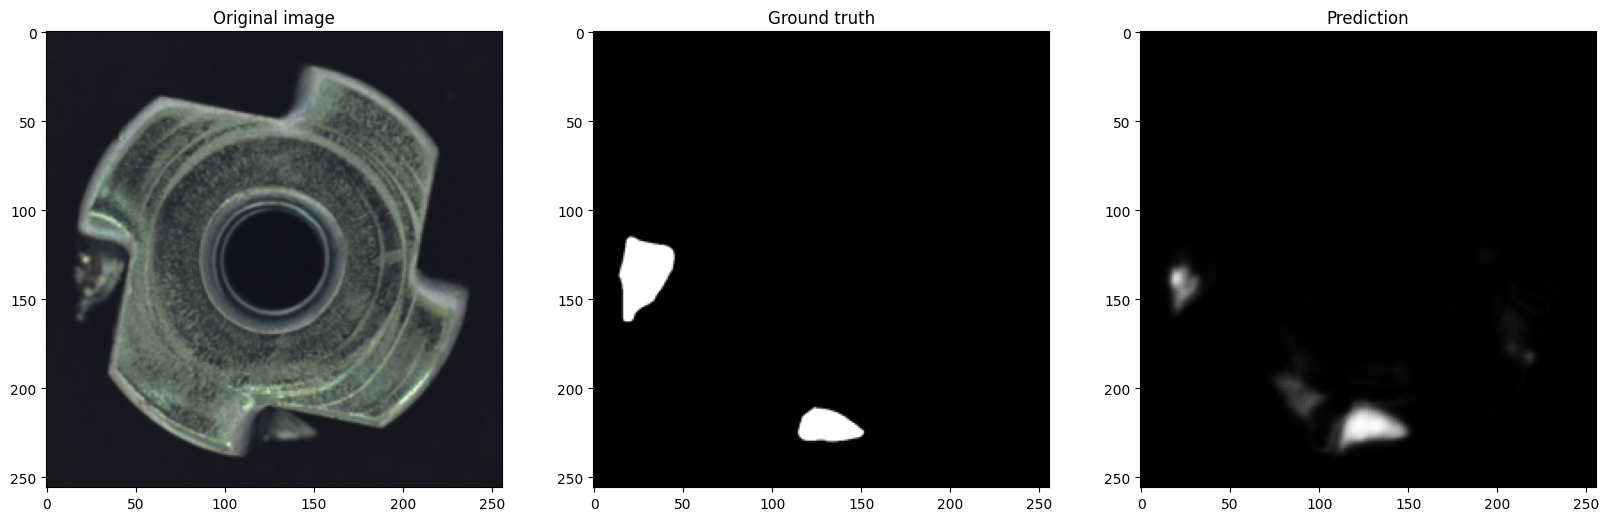

In [11]:
#for i in range(10):
#    plot_pred(model, get_model_pred, train_dataset, i, device) # keep in mind train_dataset applies random data augmentation
plot_pred(model, get_model_pred, val_dataset, 0, device, color_map=color_map)

Using cache found in /root/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


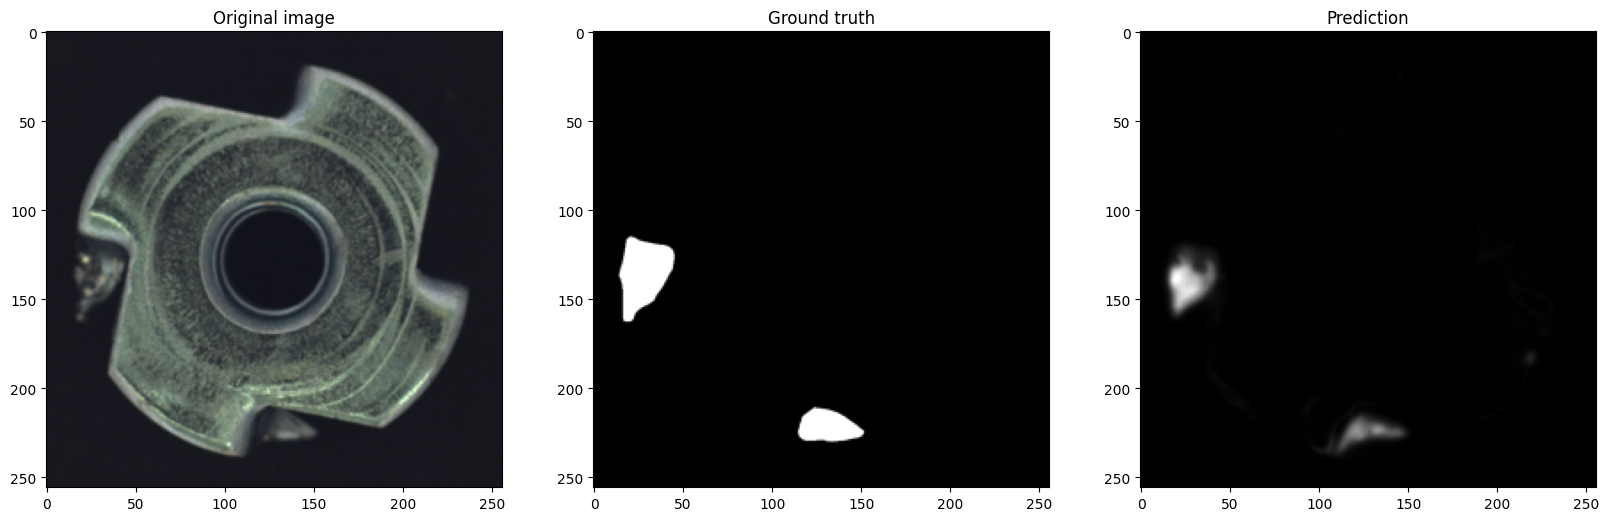

In [12]:
# test model loading and get fine-tuned model prediction example
checkpoint_path = save_path
model = load_model_checkpoint(model_name, checkpoint_path, N_categories=N_categories)
model.to(device)
plot_pred(model, get_model_pred, val_dataset, 0, device, color_map=color_map)

Using cache found in /root/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


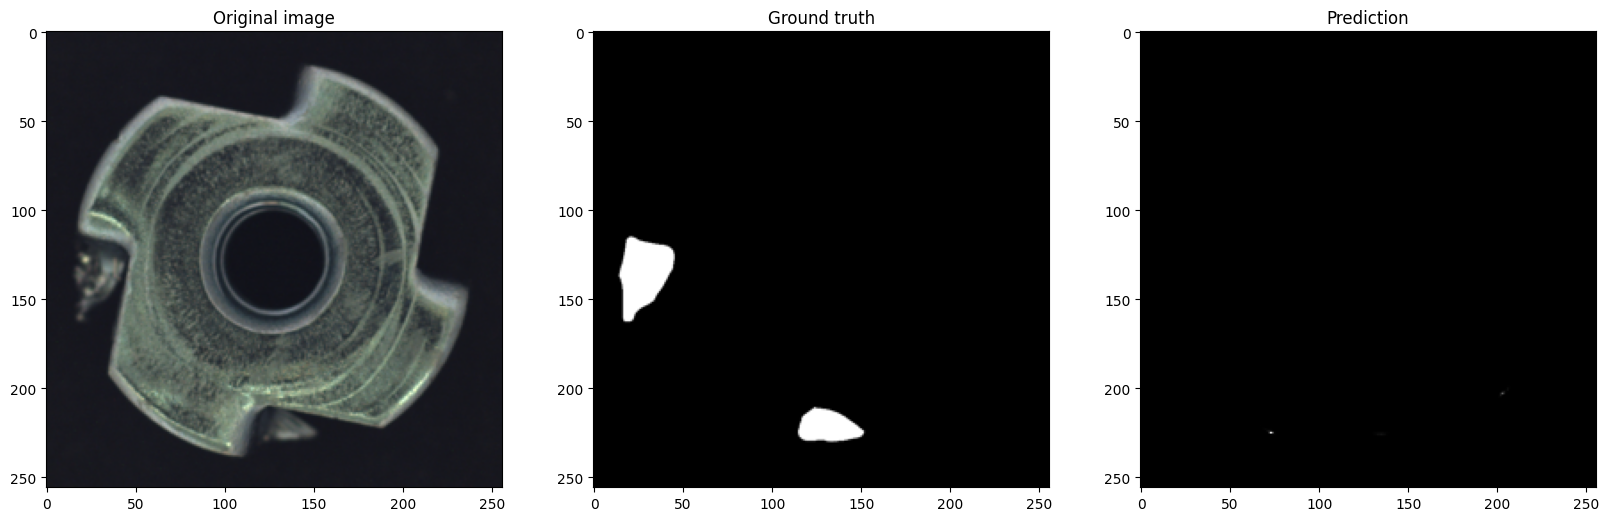

In [13]:
# original model prediction example for comparison
model, get_model_pred = get_and_adapt_pretrained_model(model_name, N_categories)
model.to(device)
plot_pred(model, get_model_pred, val_dataset, 0, device, color_map=color_map)